In [ ]:
!nvidia-smi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dataset_capstone_final.zip'
#!unzip '/content/drive/MyDrive/Dataset_img_final4.zip'

In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os 

dir_i = os.listdir('/content/Dataset_img_final')

for i in dir_i:
  dir_a = os.path.join('/content/Dataset_img_final', i)
  print(i, ' memiliki ', len(os.listdir(dir_a)))

leg-ulcer-images  memiliki  134
pressure ulcer  memiliki  856
skin tears  memiliki  54
toes  memiliki  35
DFU  memiliki  673
normal  memiliki  300
miscellaneous  memiliki  56
extravasation-wound-images  memiliki  20
orthopaedic wounds  memiliki  49
burns  memiliki  457
epidermolysis-bullosa  memiliki  5
pilonidal-sinus  memiliki  3
abdominal-wounds  memiliki  13
meningitis  memiliki  24
venous  memiliki  411
foot-ulcers  memiliki  384
haemangioma  memiliki  6
malignant-wound-images  memiliki  9
surgical  memiliki  420
trauma  memiliki  93


In [6]:
!mv "/content/Dataset_img_final/pilonidal-sinus" "/content/content"
!mv "/content/Dataset_img_final/haemangioma" "/content/content"
!mv "/content/Dataset_img_final/epidermolysis-bullosa" "/content/content"
!mv "/content/Dataset_img_final/extravasation-wound-images" "/content/content"
!mv "/content/Dataset_img_final/malignant-wound-images" "/content/content"
!mv "/content/Dataset_img_final/abdominal-wounds" "/content/content"
!mv "/content/Dataset_img_final/meningitis" "/content/content"
!mv "/content/Dataset_img_final/toes" "/content/content"
!mv "/content/Dataset_img_final/miscellaneous" "/content/content"
!mv "/content/Dataset_img_final/skin tears" "/content/content"
!mv "/content/Dataset_img_final/trauma" "/content/content"
!mv "/content/Dataset_img_final/orthopaedic wounds" "/content/content"
!mv "/content/Dataset_img_final/leg-ulcer-images" "/content/content"
!mv "/content/Dataset_img_final/normal" "/content/content"
!mv "/content/Dataset_img_final/DFU" "/content/content"

In [7]:
import splitfolders

folder = '/content/Dataset_img_final'

splitfolders.ratio(folder, output='/content/Dataset_split',
                 seed=42, ratio=(0.8, 0.2),
                 group_prefix = None
                 )

Copying files: 2528 files [00:00, 7331.59 files/s]


In [8]:
import os 

dir_i = os.listdir('/content/Dataset_split/train')

for i in dir_i:
  dir_a = os.path.join('/content/Dataset_split/train', i)
  print(i, ' memiliki ', len(os.listdir(dir_a)))

pressure ulcer  memiliki  684
burns  memiliki  365
venous  memiliki  328
foot-ulcers  memiliki  307
surgical  memiliki  336


In [9]:
import os 

dir_i = os.listdir('/content/Dataset_split/val')

for i in dir_i:
  dir_a = os.path.join('/content/Dataset_split/val', i)
  print(i, ' memiliki ', len(os.listdir(dir_a)))

pressure ulcer  memiliki  172
burns  memiliki  92
venous  memiliki  83
foot-ulcers  memiliki  77
surgical  memiliki  84


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Dataset_split/train'
val_dir = '/content/Dataset_split/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    ) 
validation_generator = train_datagen.flow_from_directory(
    val_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    )


Found 2020 images belonging to 5 classes.
Found 508 images belonging to 5 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [14]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, restore_best_weights=True)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [15]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [16]:
history = model.fit(train_generator,
                    steps_per_epoch= 2020 // 32,
                    validation_data=validation_generator,
                    validation_steps= 508 // 32,
                    epochs=100,
                    callbacks=[callbacks,mc],
                    verbose=1
                  )

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 1.5989 - acc: 0.2993
Epoch 1: val_acc improved from -inf to 0.33958, saving model to best_model_1.h5
63/63 [==============================] - 36s 380ms/step - loss: 1.5989 - acc: 0.2993 - val_loss: 1.5830 - val_acc: 0.3396
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 1.5746 - acc: 0.3365
Epoch 2: val_acc did not improve from 0.33958
63/63 [==============================] - 23s 363ms/step - loss: 1.5746 - acc: 0.3365 - val_loss: 1.5636 - val_acc: 0.3396
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 1.5678 - acc: 0.3360
Epoch 3: val_acc improved from 0.33958 to 0.34167, saving model to best_model_1.h5
63/63 [==============================] - 22s 353ms/step - loss: 1.5678 - acc: 0.3360 - val_loss: 1.5579 - val_acc: 0.3417
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 1.5613 - acc: 0.3390
Epoch 4: val_acc did not improve from 0.34167
63/63 [============

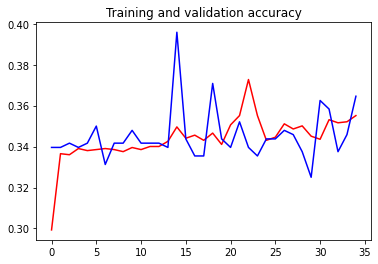

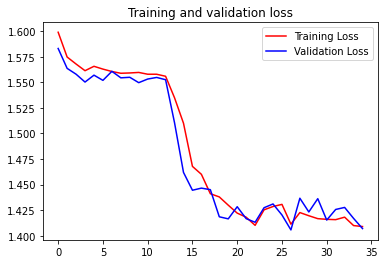

In [17]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()